In [1]:
import pandas as pd
import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras import optimizers
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
import math
%matplotlib inline

In [2]:
df = pd.read_excel('EasternShoreIslandsKelpSurvey2018/ESI_Framegrab_Final.xlsx')
print(df)

           SiteName Depth(m) Diver ImageNumber ImageAnalyzedNumber  \
0              Code       na    na          na                  na   
1     Nowlans Shoal        6    AB           1                 NaN   
2     Nowlans Shoal        6    AB           2                 NaN   
3     Nowlans Shoal        6    AB           3                 NaN   
4     Nowlans Shoal        6    AB           4                 NaN   
...             ...      ...   ...         ...                 ...   
3703        Goose I        9    KA          54                 NaN   
3704        Goose I        9    KA          55                 NaN   
3705        Goose I        9    KA          56                 NaN   
3706        Goose I        9    KA          57                 NaN   
3707        Goose I        9    KA          58                 NaN   

     PhotoAnalyzed(0,1)    ReasonOmitted ImageWidth(cm) ImageLength(cm)  \
0                    na               na             na              na   
1        

In [3]:
df = df[df['PhotoAnalyzed(0,1)'] == 1]
islands = list(set(df['SiteName']))
print(islands)

['Harbour I', 'Bird I', 'Halibut I', 'Pumpkin I', 'Bird I Breakers', 'Speck I', 'The Moll', 'Fish I', 'Gold I', 'Crooks I', 'Long I', 'Barren I', 'Tuffin I', 'Camp I', 'Nowlans Shoal', 'Goose I', 'White I']


In [4]:
df.head()

,SiteName,Depth(m),Diver,ImageNumber,ImageAnalyzedNumber,"PhotoAnalyzed(0,1)",ReasonOmitted,ImageWidth(cm),ImageLength(cm),AreaPerPoint(cm^2),...,PlumbLine,Unknown,MembraniporaMembranacea,MixedChondrusTurf,CorallinaOfficinalis,MixedChondrusTurfCorallina,JuvenileSaccharinaLatissima,MixedChondrusCoralina,MixedTurfCorallina,TotalPts
8,Nowlans Shoal,6,AB,8,1,1,NaN,178.84,100.53,200,...,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,91
11,Nowlans Shoal,6,AB,11,2,1,NaN,179,100.62,200,...,0.0,0.0,0.0,29.0,0.0,15.0,NaN,NaN,NaN,91
14,Nowlans Shoal,6,AB,14,3,1,NaN,172.65,97.05,175,...,0.0,0.0,0.0,35.0,NaN,NaN,NaN,NaN,NaN,91
17,Nowlans Shoal,6,AB,17,4,1,NaN,166.2,93.42,175,...,0.0,0.0,0.0,37.0,NaN,NaN,NaN,NaN,NaN,91
20,Nowlans Shoal,6,AB,20,5,1,NaN,184.24,103.57,200,...,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,2.0,91


In [5]:
df['Kelp'] = df[df.columns[[12,13,14,15,16,17,34,38]]].sum(axis=1)

In [6]:
df['algae1'] = df[df.columns[[18,19,20,22,23,25,35,36,37,39]]].sum(axis=1)
df['algae2'] = df[df.columns[[21,24,26,40]]].sum(axis=1)
df['rock'] = df[df.columns[[27,28,29,30,31]]].sum(axis=1)
df['unknown'] = df[df.columns[[32,33]]].sum(axis=1)

In [7]:
df.head()

,SiteName,Depth(m),Diver,ImageNumber,ImageAnalyzedNumber,"PhotoAnalyzed(0,1)",ReasonOmitted,ImageWidth(cm),ImageLength(cm),AreaPerPoint(cm^2),...,MixedChondrusTurfCorallina,JuvenileSaccharinaLatissima,MixedChondrusCoralina,MixedTurfCorallina,TotalPts,Kelp,algae1,algae2,rock,unknown
8,Nowlans Shoal,6,AB,8,1,1,NaN,178.84,100.53,200,...,NaN,NaN,NaN,NaN,91,26.0,24.0,41.0,0.0,0.0
11,Nowlans Shoal,6,AB,11,2,1,NaN,179,100.62,200,...,15.0,NaN,NaN,NaN,91,17.0,44.0,30.0,0.0,0.0
14,Nowlans Shoal,6,AB,14,3,1,NaN,172.65,97.05,175,...,NaN,NaN,NaN,NaN,91,10.0,35.0,46.0,0.0,0.0
17,Nowlans Shoal,6,AB,17,4,1,NaN,166.2,93.42,175,...,NaN,NaN,NaN,NaN,91,22.0,37.0,32.0,0.0,0.0
20,Nowlans Shoal,6,AB,20,5,1,NaN,184.24,103.57,200,...,0.0,0.0,0.0,2.0,91,13.0,26.0,52.0,0.0,0.0


In [8]:
df.to_csv('cleaneddataset.csv')

In [9]:
train_image = []
test_image = []
for i in tqdm(df.itertuples()):

    island = i.SiteName.replace(" ", "")
    # if(island=='TuffinI'):
    #     m_t = str(i[2]) + 'm'
    #     diver_t = m_t + '_' + i.Diver
    #     im_num_t = str(i.ImageNumber).zfill(3)
    #     im_name_t = island + str(i[2]) + i.Diver[0] + '_' + im_num_t
    #     img_t = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver_t + "/" + im_name_t +'.jpg', target_size=(500,500,3))
    #     img_t = image.img_to_array(img_t)
    #     img_t = img_t/255
    #     test_image.append(img_t)
    # else:
    m = str(i[2]) + 'm'
    diver = m + '_' + i.Diver
    im_num = str(i.ImageNumber).zfill(3)
    im_name = island + str(i[2]) + i.Diver[0] + '_' + im_num
    img = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver + "/" + im_name +'.jpg', target_size=(500,500,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
# X_test = np.array(test_image)

1069it [00:23, 46.40it/s]


In [10]:
print(X.shape)

(1069, 500, 500, 3)


In [75]:
X_test.shape

NameError: name 'X_test' is not defined

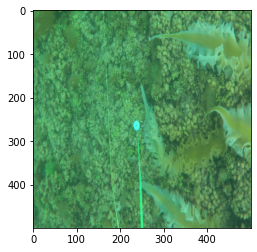

In [11]:
plt.imshow(X[3])

In [12]:
print(df.columns)

Index(['SiteName', 'Depth(m)', 'Diver', 'ImageNumber', 'ImageAnalyzedNumber',
       'PhotoAnalyzed(0,1)', 'ReasonOmitted', 'ImageWidth(cm)',
       'ImageLength(cm)', 'AreaPerPoint(cm^2)', 'Total', 'NullPoint',
       'SaccharinaLatissima', 'LaminariaDigitata', 'AgarumClathratum',
       'AlariaEsculenta', 'SacchorizaDermatodea', 'UnidentifiedKelp',
       'ZosteraMarina', 'CodiumFragile', 'Fucusspp', 'Turf', 'ChondusCrispus',
       'PalmariaPalmata', 'CorallineAlgae', 'Desmarestiaspp',
       'UnifentifiedAlgae', 'Bedrock', 'Boulder', 'Cobble', 'Pebble', 'Sand',
       'PlumbLine', 'Unknown', 'MembraniporaMembranacea', 'MixedChondrusTurf',
       'CorallinaOfficinalis', 'MixedChondrusTurfCorallina',
       'JuvenileSaccharinaLatissima', 'MixedChondrusCoralina',
       'MixedTurfCorallina', 'TotalPts', 'Kelp', 'algae1', 'algae2', 'rock',
       'unknown'],
      dtype='object')


In [13]:
# y_test = df[df.SiteName == 'Tuffin I']

In [14]:
# y_train = df[df.SiteName != 'Tuffin I']

In [15]:
# y_test = y_test[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']]

In [16]:
y_train = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']]

In [17]:
y_train = y_train.fillna(0)
# y_test = y_test.fillna(0)

In [18]:
# y_test.head(10)

In [19]:
y_train.head(10)


,Kelp,algae1,algae2,rock,unknown
8,26.0,24.0,41.0,0.0,0.0
11,17.0,44.0,30.0,0.0,0.0
14,10.0,35.0,46.0,0.0,0.0
17,22.0,37.0,32.0,0.0,0.0
20,13.0,26.0,52.0,0.0,0.0
26,14.0,44.0,30.0,3.0,0.0
29,10.0,28.0,53.0,0.0,0.0
32,18.0,31.0,42.0,0.0,0.0
35,9.0,47.0,35.0,0.0,0.0
38,32.0,19.0,40.0,0.0,0.0


In [85]:
# y_test = y_test.astype(bool).astype(int)

In [86]:
# y_test.head()

In [20]:
y_train = y_train.astype(bool).astype(int)

In [21]:
y_train

,Kelp,algae1,algae2,rock,unknown
8,1,1,1,0,0
11,1,1,1,0,0
14,1,1,1,0,0
17,1,1,1,0,0
20,1,1,1,0,0
...,...,...,...,...,...
3676,1,1,0,0,1
3684,1,1,0,0,0
3690,1,1,0,0,1
3696,1,0,0,0,0


In [22]:
y_train['Kelp'].value_counts()

1    1038
0      31
Name: Kelp, dtype: int64

In [90]:
# import seaborn as sns
# categories = list(y_test.columns.values)
# sns.set(font_scale = 2)
# plt.figure(figsize=(15,8))
# ax= sns.barplot(categories, y_test.iloc[:,:].sum().values)
#
# plt.ylabel('Number of samples', fontsize=18)
# plt.xlabel('Species', fontsize=18)
#
# rects = ax.patches
# labels = y_test.iloc[:,:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
# plt.show()

In [91]:
# y_train = y_train.div(y_train.sum(axis=1), axis=0)
# y_test = y_test.div(y_test.sum(axis=1), axis=0)

In [92]:
# from skmultilearn.model_selection import iterative_train_test_split
# X_train, y_train, X_val, y_val = iterative_train_test_split(X, ytrain, test_size = 0.2)


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.20, random_state=42, stratify=y_train)

# X = np.concatenate((X_train, X_val))
# ytrain = np.concatenate((y_train, y_val))

C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


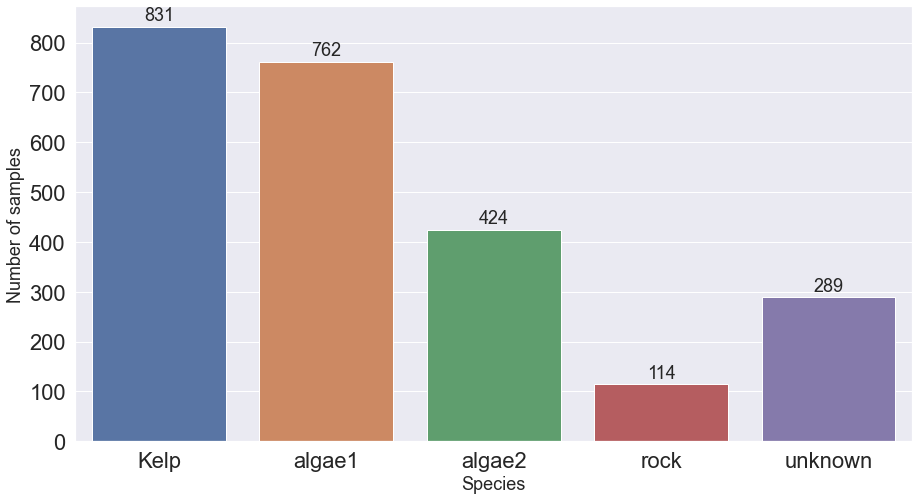

In [24]:
categories = list(y_train.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, y_train.iloc[:,:].sum().values)

plt.ylabel('Number of samples', fontsize=18)
plt.xlabel('Species', fontsize=18)

rects = ax.patches
labels = y_train.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

C:\Users\gawai\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


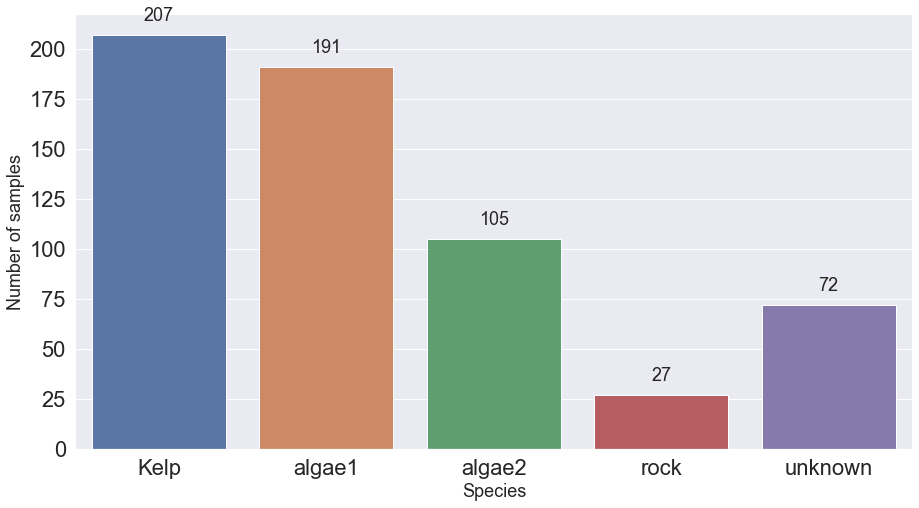

In [25]:
categories = list(y_val.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, y_val.iloc[:,:].sum().values)

plt.ylabel('Number of samples', fontsize=18)
plt.xlabel('Species', fontsize=18)

rects = ax.patches
labels = y_val.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

First way

In [101]:
X_t = np.reshape(X_train, (X_train.shape[0], -1))

In [102]:
X_t.shape

(855, 750000)

Another way

In [103]:
vol_shape = X_train.shape[:-1]
vol_shape

(855, 500, 500)

In [104]:
n_voxels = np.prod(vol_shape)
n_voxels

213750000

In [105]:
voxel_by_time = X_train.reshape(n_voxels, X_train.shape[-1])
voxel_by_time.shape

(213750000, 3)

In [86]:
X_sub, y_sub = get_minority_instace(X_train, y_train)   #Getting minority instance of that datframe
X_res,y_res =MLSMOTE(X_sub, y_sub, 100)

AttributeError: 'builtin_function_or_method' object has no attribute 'isin'

In [63]:
ytrain = np.array(y_train)
yval = np.array(y_val)

In [65]:
datagen_args = dict(
        brightness_range=[0.2,1.0],
        rotation_range=30,
        shear_range = 0.2,
        horizontal_flip=True,
        vertical_flip =True)
image_datagen = ImageDataGenerator(**datagen_args)
# image_datagen.fit(X)

train_generator = image_datagen.flow(X_train, ytrain, batch_size=60, shuffle=True, seed=7)
#
# validation_generator = image_datagen.flow(X, ytrain, batch_size=60, subset='validation',  shuffle=True, seed=7)

In [67]:
early_stopping = EarlyStopping(patience=15, monitor='val_loss', min_delta=1e-3, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1)

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(500,500,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation("sigmoid"))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 500, 500, 32)      896       
                                                                 
 activation_14 (Activation)  (None, 500, 500, 32)      0         
                                                                 
 batch_normalization_12 (Bat  (None, 500, 500, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 166, 166, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 166, 166, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 166, 166, 64)     

In [48]:
# optimizer=optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    epochs = 20,
                    workers=-1,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
14/14 [==============================] - 213s 15s/step - loss: 1.1061 - accuracy: 0.2400 - val_loss: 2.3820 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 279s 20s/step - loss: 0.7854 - accuracy: 0.3288 - val_loss: 1.0688 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 278s 21s/step - loss: 0.7663 - accuracy: 0.3400 - val_loss: 2.5162 - val_accuracy: 0.0150 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 244s 17s/step - loss: 0.6463 - accuracy: 0.4638 - val_loss: 0.8588 - val_accuracy: 0.1050 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 247s 18s/step - loss: 0.6193 - accuracy: 0.4762 - val_loss: 1.0519 - val_accuracy: 0.1700 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 232s 17s/step - loss: 0.6219 - accuracy: 0.4538 - val_loss: 1.1019 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 213s 15s/step - lo

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


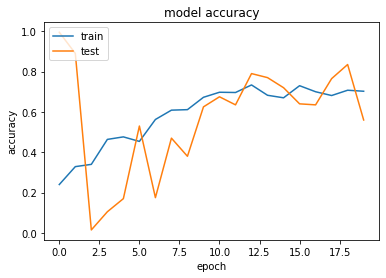

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

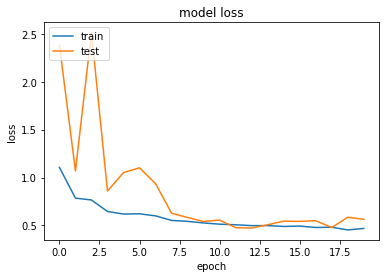

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
print(len(X_test))
print(len(y_test))

69
69


In [55]:
imgtest = image.load_img('EasternShoreIslandsKelpSurvey2018/BirdI/6m_KA/BirdI6K_011.jpg', target_size=(500,500,3))
imgtest = image.img_to_array(imgtest)
imgtest = imgtest/255

[[0.9990045  0.7180229  0.82648957 0.11587873 0.19478348]]
[0 2 1 4 3]
Kelp (0.999)
algae2 (0.826)
algae1 (0.718)
unknown (0.195)
rock (0.116)


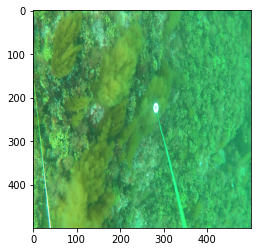

In [56]:
classes = np.array(y_test.columns)
proba = model.predict(imgtest.reshape(1,500,500,3))
print(proba)
top_3 = np.argsort(proba[0])[:-6:-1]
print(top_3)
for i in range(5):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(imgtest)